In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils
import hes1_utils_general as general
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import wasserstein_distance
from numba import jit
from scipy.special import rel_entr


import warnings
warnings.filterwarnings("ignore")

In [2]:
ratio=(1+np.sqrt(5))/2

In [3]:
date_and_time=time.localtime()
string_date=str(date_and_time.tm_year)+'-'+str(date_and_time.tm_mon)+'-'+str(date_and_time.tm_mday)+'-'+str(date_and_time.tm_hour)+'-'+str(date_and_time.tm_min)+'-'+str(date_and_time.tm_sec)

In [4]:
os.makedirs(os.getcwd() + '\\paper plots ' + string_date)

read_directory = os.getcwd() + '\\paper plots ' + string_date        #specify here the folder you want to use

try:
    os.makedirs(read_directory+'\\data1')
    os.makedirs(read_directory+'\\data2')
    os.makedirs(read_directory+'\\plots')
except FileExistsError:
    pass


In [5]:
plt.rcParams.update({'font.size': 20})

# Influence of the swtiching noise on the full model (time series)

We plot timeseries of the full model (standard Gillespie algorithm) and of the full model using average switching noise (Gillespie algorithm where the environment switching is replaced by the Hill function).
Functions are defined in the file "master".

## 1) First set of parameters (_PARAM1_)

First we use the following set of parameter values, referred to as _PARAM1_:

In [6]:
alpha_m=1
alpha_p=1
mu_m=0.03
mu_p=0.03
h=4.1
P_0=10

T=10000
delta_t=0.001

n_t=int(T/delta_t)

val_lambda=0.25
val_Omega=100
val_tau=19.7

In [7]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,h=h,P_0=P_0,
                                                      lambda_s=val_lambda,        
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)

time_trajmns,mRNA_trajmns,Hes1_trajmns = master.one_trajectory_noSwitchNoise(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega) 

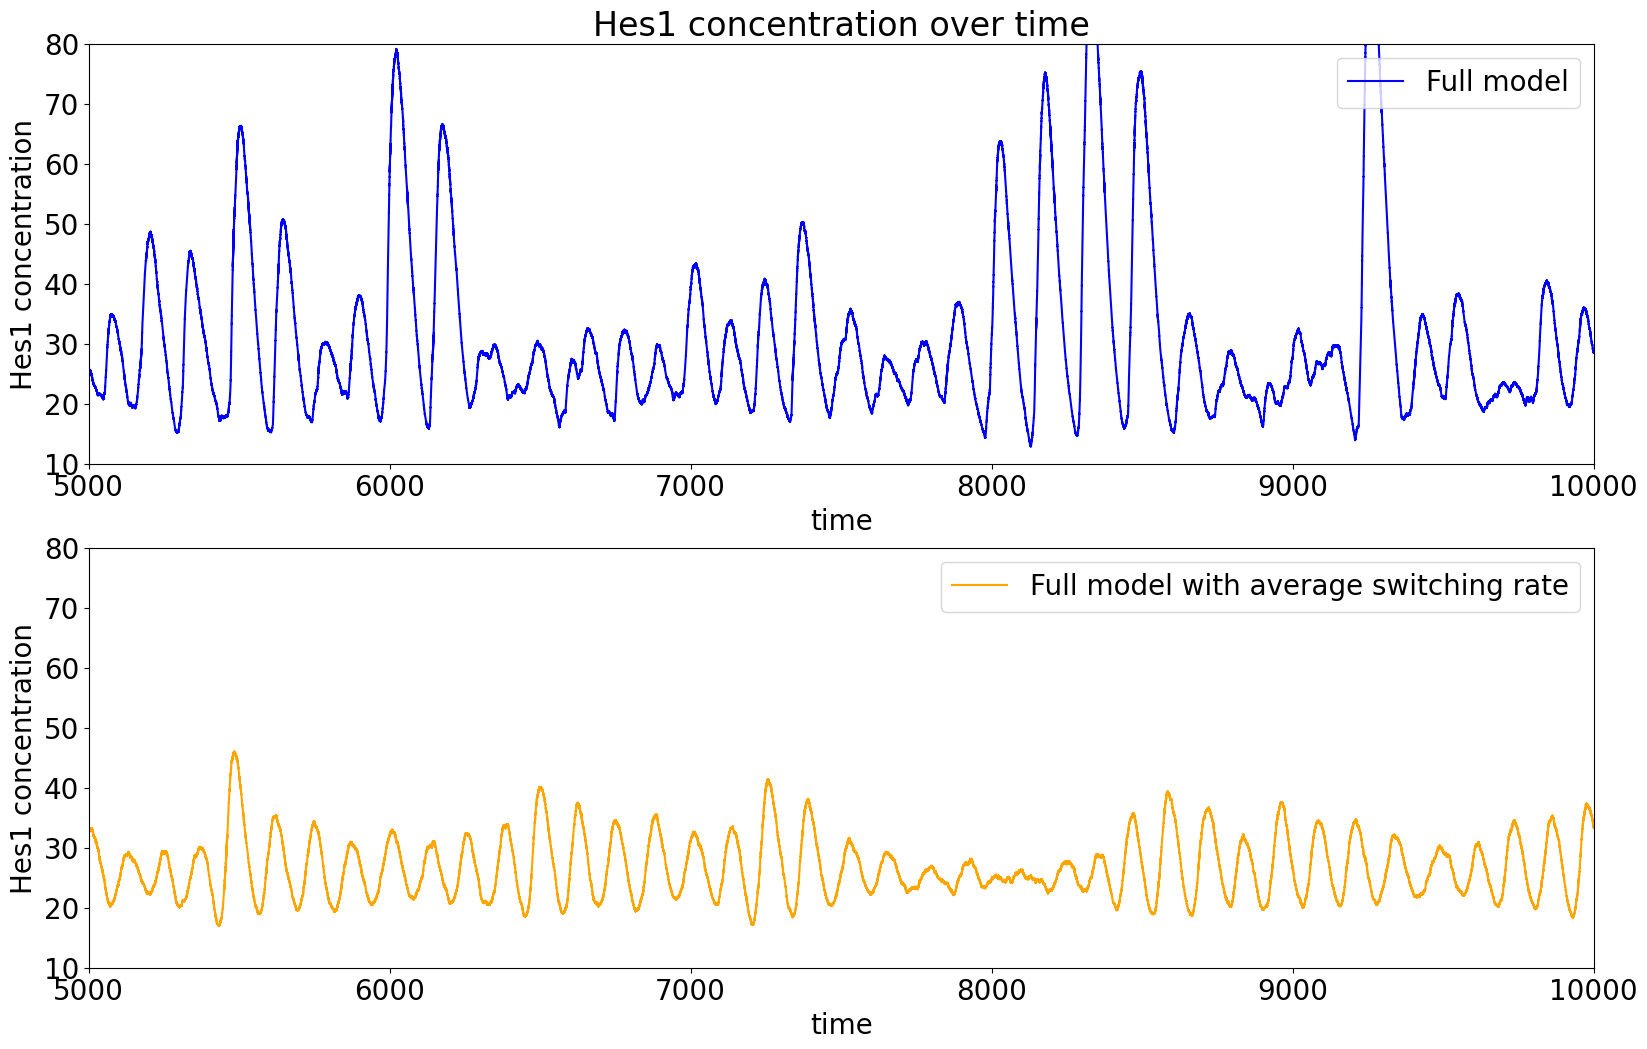

In [8]:
fig,ax=plt.subplots(2,1, figsize=(12*ratio,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(10,80)
ax[0].set_xlim(5000,10000)
    
linem, = ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(10,80)
ax[1].set_xlim(5000,10000)

linemns, = ax[1].plot(time_trajmns,Hes1_trajmns, color = 'orange')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')

plt.savefig(read_directory+'\\plots\\trajP - comparison full with vs without switching - param1.pdf')
    
plt.show()

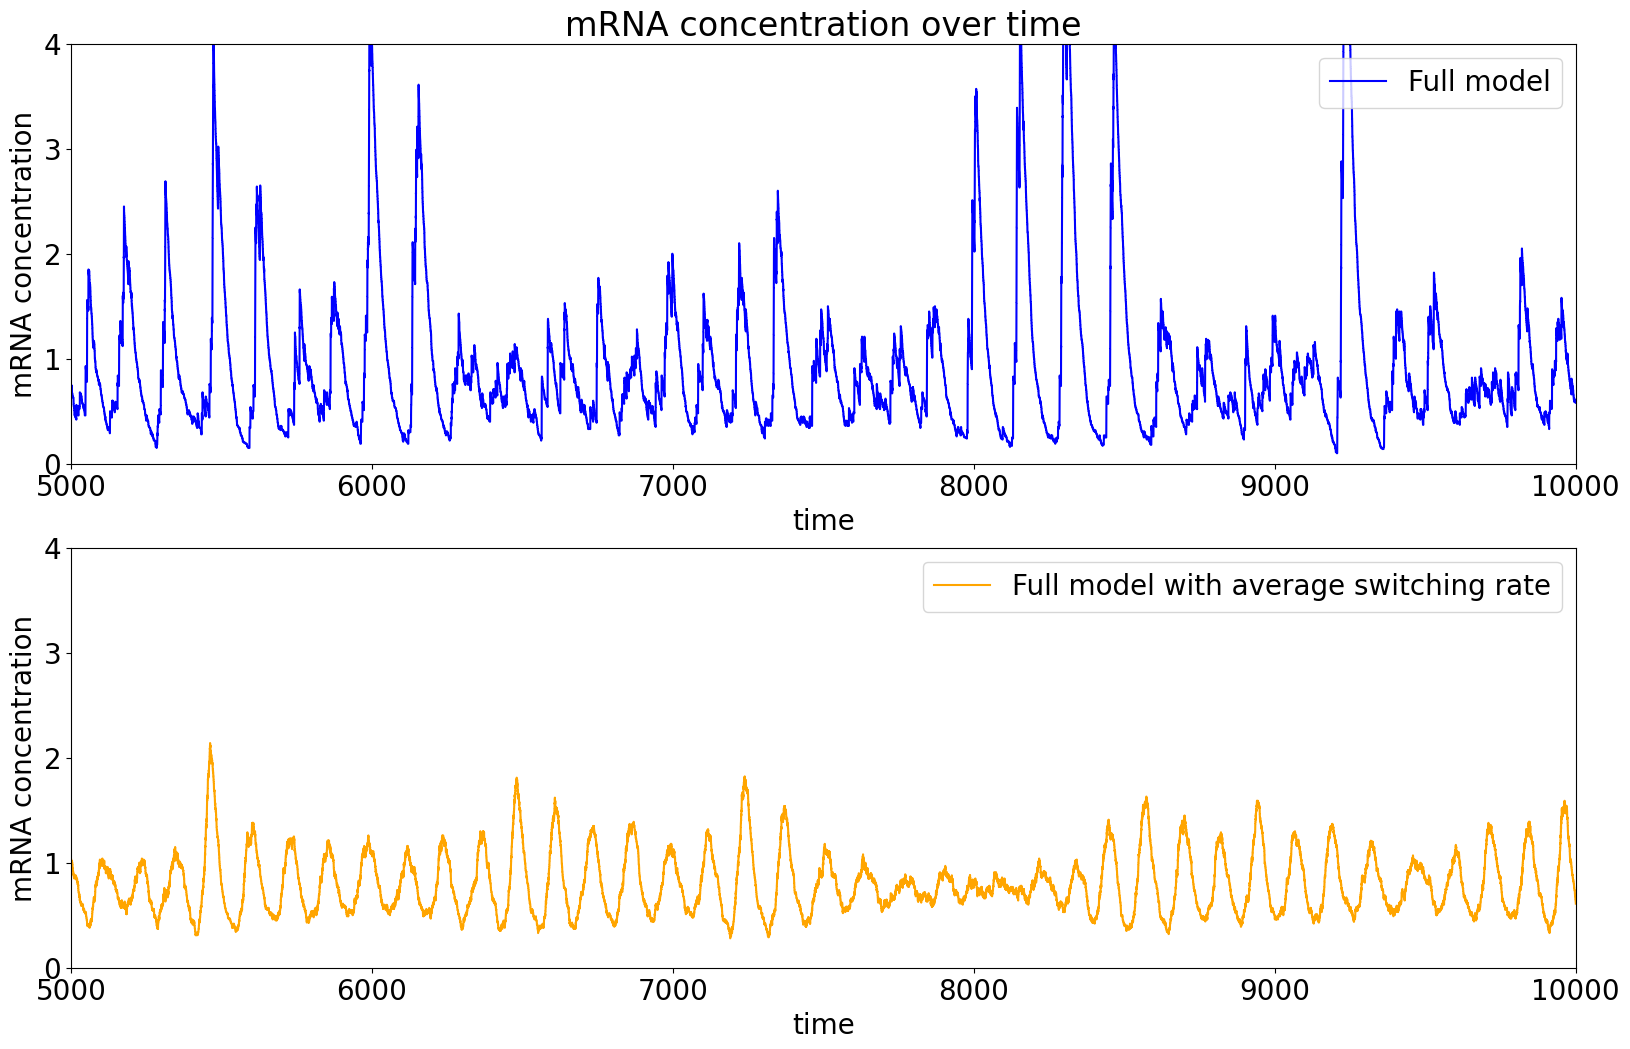

In [9]:
fig,ax=plt.subplots(2,1, figsize=(12*ratio,12))
    
ax[0].set_title('mRNA concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('mRNA concentration') 

ax[0].set_ylim(0,4)
ax[0].set_xlim(5000,10000)
    
linem, = ax[0].plot(time_trajm,mRNA_trajm, color = 'blue')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('mRNA concentration')

ax[1].set_ylim(0,4)
ax[1].set_xlim(5000,10000)

linemns, = ax[1].plot(time_trajmns,mRNA_trajmns, color = 'orange')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')
    
plt.show()

## 2) Second set of values (_PARAM2_)

Next we use the set of values proposed in _Quantitative single-cell live imaging links HES5 dynamics with cell-state and fate in murine neurogenesis_ (Cerys S. Manning, Veronica Biga, James Boyd, Jochen Kursawe, Bodvar Ymisson, David G. Spiller, Christopher M. Sanderson, Tobias Galla, Magnus Rattray, Nancy Papalopulu), figure 6. These values are referred to as _PARAM2_.

In [10]:
alpha_m=39.93
alpha_p=21.56
mu_m=0.033
mu_p=0.011
h=4.78
P_0=24201.01

T=10000
delta_t=0.001

n_t=int(T/delta_t)

val_lambda=0.25
val_Omega=1
val_tau=34

In [11]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,h=h,P_0=P_0,
                                                      lambda_s=val_lambda,        
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)

time_trajmns,mRNA_trajmns,Hes1_trajmns = master.one_trajectory_noSwitchNoise(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)

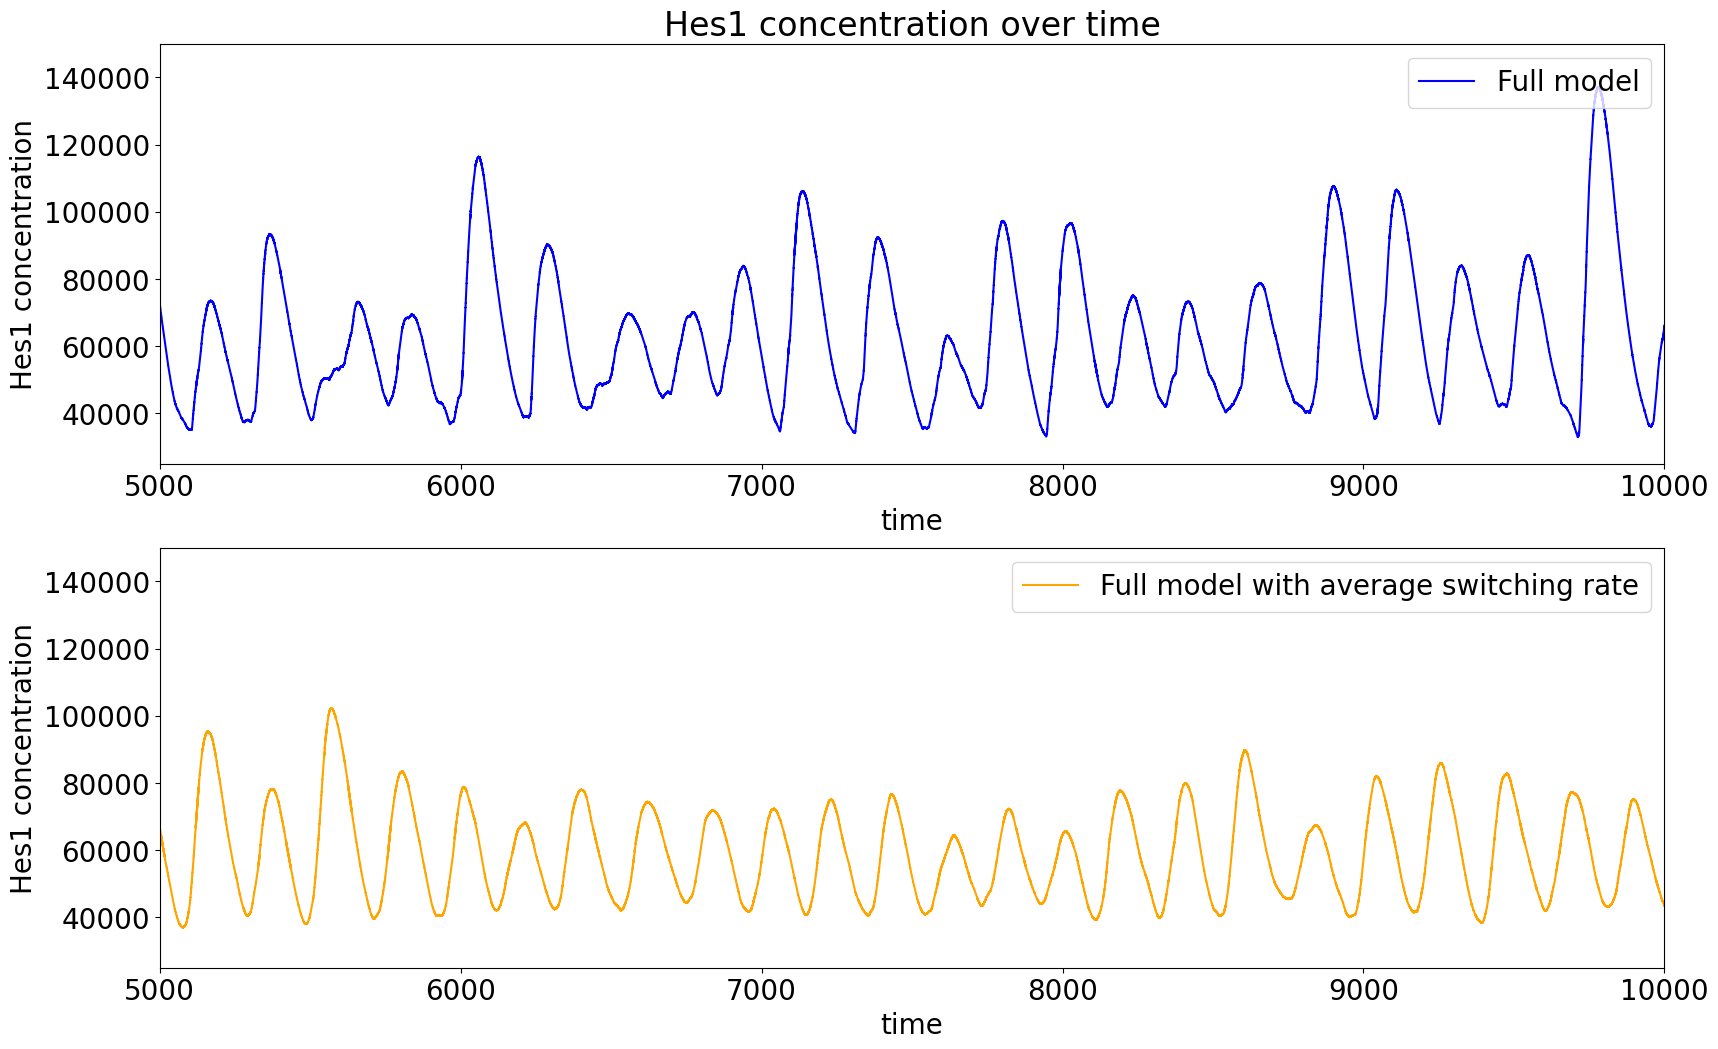

In [12]:
fig,ax=plt.subplots(2,1, figsize=(12*ratio,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(25000,150000)
ax[0].set_xlim(5000,10000)
    
linem, = ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(25000,150000)
ax[1].set_xlim(5000,10000)

linemns, = ax[1].plot(time_trajmns,Hes1_trajmns, color = 'orange')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')

plt.savefig(read_directory+'\\plots\\trajP - comparison full with vs without switching - param2.pdf')
    
plt.show()

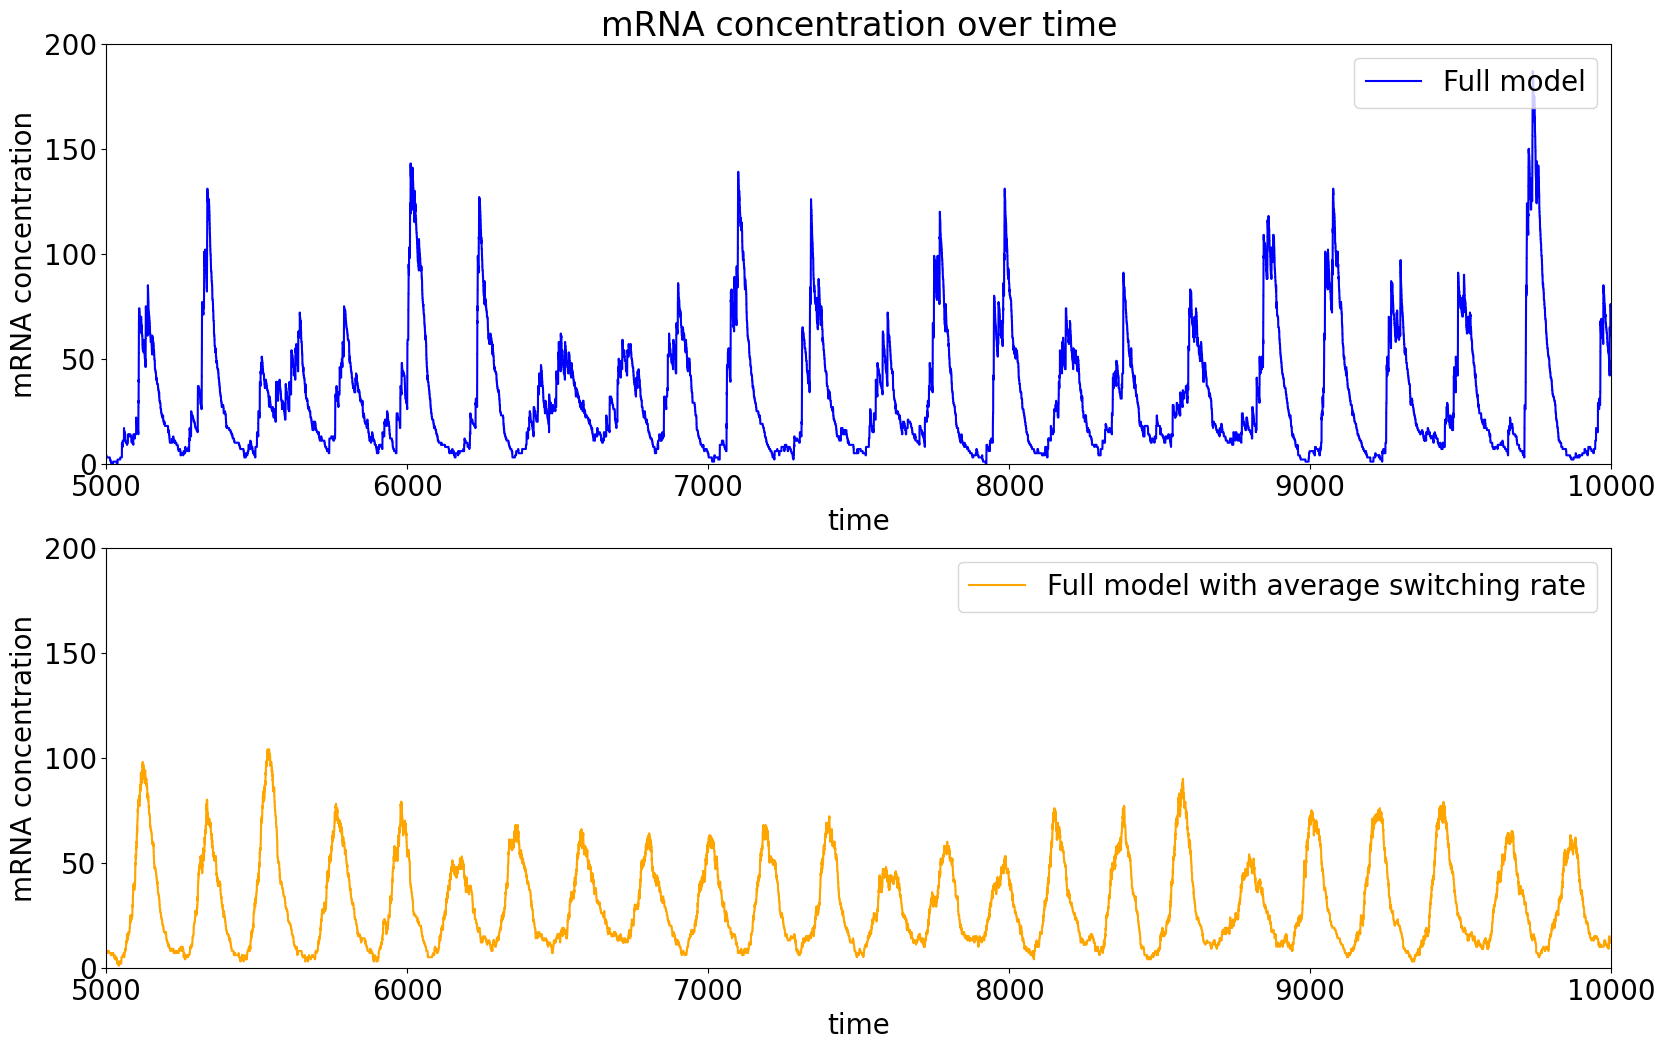

In [13]:
fig,ax=plt.subplots(2,1, figsize=(12*ratio,12))
    
ax[0].set_title('mRNA concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('mRNA concentration') 

ax[0].set_ylim(0,200)
ax[0].set_xlim(5000,10000)
    
linem, = ax[0].plot(time_trajm,mRNA_trajm, color = 'blue')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('mRNA concentration')

ax[1].set_ylim(0,200)
ax[1].set_xlim(5000,10000)

linemns, = ax[1].plot(time_trajmns,mRNA_trajmns, color = 'orange')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')
    
plt.show()

# Comparison Langevin VS full model

We plot timeseries of the full model (standard Gillespie algorithm) and of the Langevin model i.e using SPDEs.
Functions are defined in the files "master" and "langevin".

## Time series for _PARAM1_

In [14]:
alpha_m=1
alpha_p=1
mu_m=0.03
mu_p=0.03
h=4.1
P_0=10

T=10000
delta_t=0.001

n_t=int(T/delta_t)

val_lambda=0.25
val_Omega=1000
val_tau=19.7

In [15]:
m_stat,p_stat = utils.resolve_stationary_state(alpha_m,mu_m,alpha_p,mu_p,h,P_0)

In [16]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)
        
time_trajl,mRNA_trajl,Hes1_trajl = langevin.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=delta_t,
                                                      Omega=val_Omega)

time_trajlna,mRNA_trajlna,Hes1_trajlna = langevin.one_trajectory_LNA(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      T=T,
                                                      delta_t=delta_t)

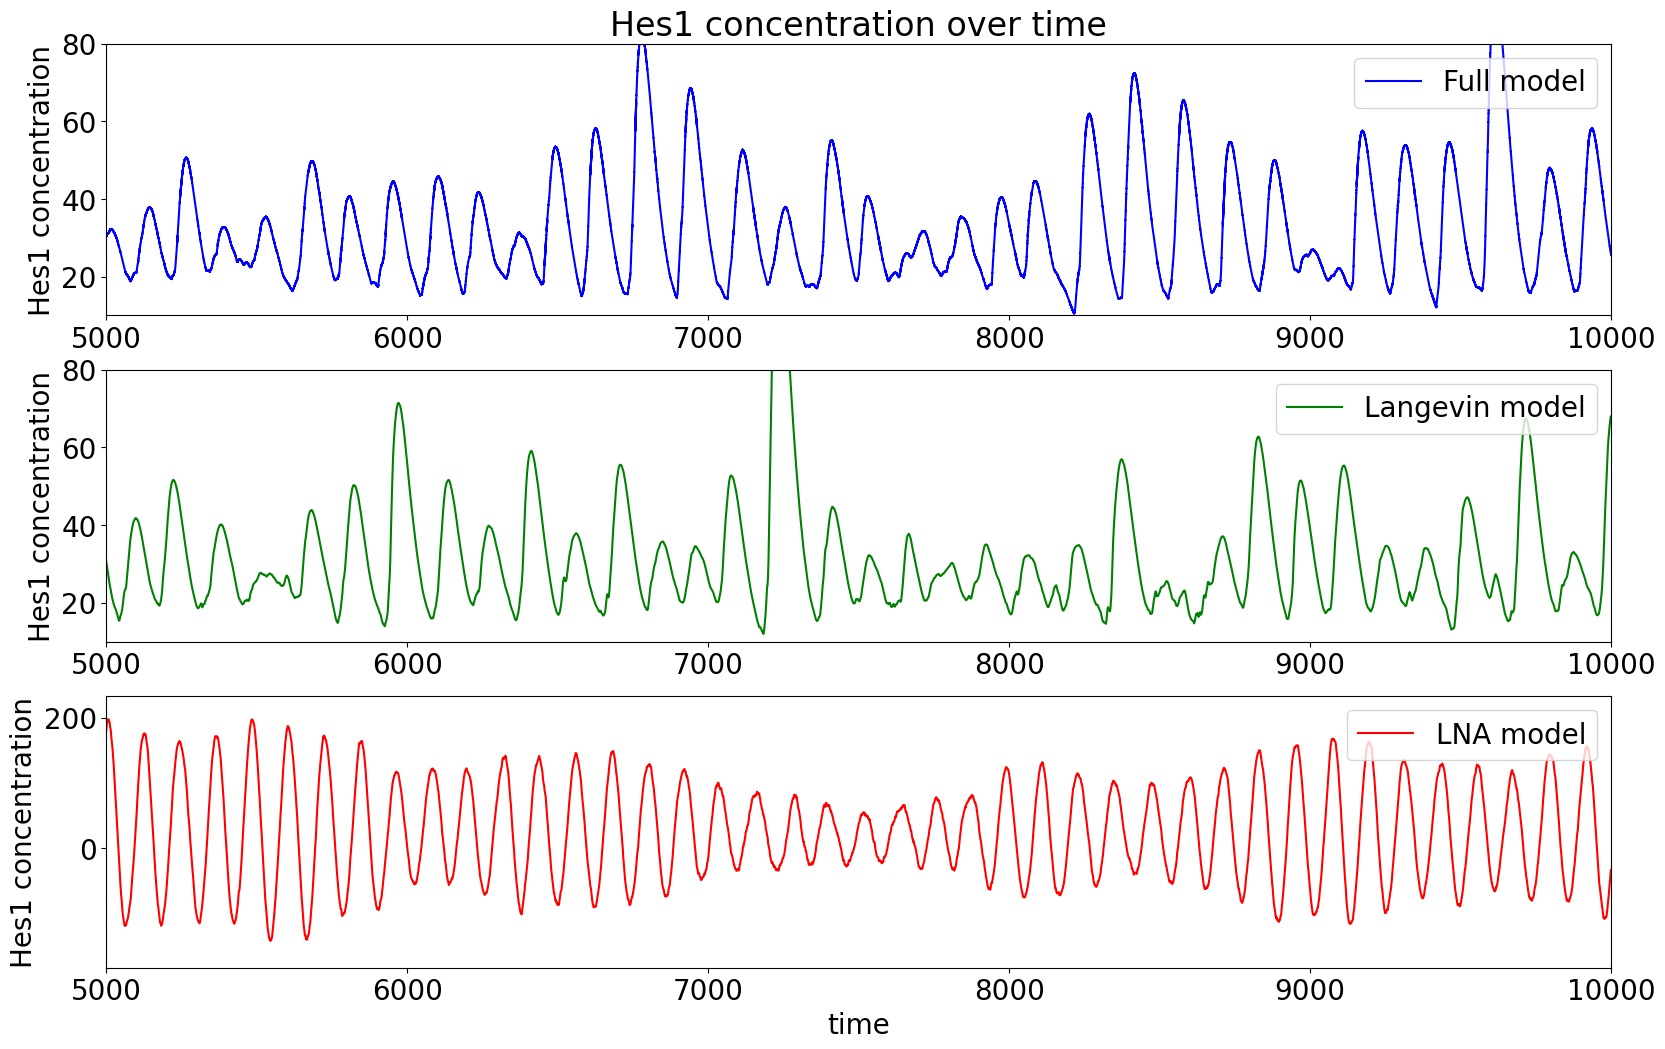

In [17]:
fig,ax=plt.subplots(3,1,figsize=(12*ratio,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(10,80)
ax[0].set_xlim(5000,10000)
    
linem,=ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
ax[0].legend([linem], ['Full model'], loc='upper right')



ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(10,80)
ax[1].set_xlim(5000,10000)
    
linel,=ax[1].plot(time_trajl,Hes1_trajl, color = 'green')
ax[1].legend([linel], ['Langevin model'], loc='upper right')



ax[2].set_xlabel('time') 
ax[2].set_ylabel('Hes1 concentration')

#ax[2].set_ylim(10,80)
ax[2].set_xlim(5000,10000)
    
linelna,=ax[2].plot(time_trajlna,Hes1_trajlna + p_stat, color = 'red')
ax[2].legend([linelna], ['LNA model'], loc='upper right')



plt.savefig(read_directory+'\\plots\\trajP - comparison Full vs Langevin - param1.pdf')
plt.show()

## Time series for _PARAM2_

In [18]:
alpha_m=39.93
alpha_p=21.56
mu_m=0.033
mu_p=0.011
h=4.78
P_0=24201.01

T=10000
delta_t=0.001

n_t=int(T/delta_t)

val_lambda=0.25
val_Omega=1
val_tau=34

In [19]:
m_stat,p_stat = utils.resolve_stationary_state(alpha_m,mu_m,alpha_p,mu_p,h,P_0)

In [20]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)
        
time_trajl,mRNA_trajl,Hes1_trajl = langevin.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=delta_t,
                                                      Omega=val_Omega)

time_trajlna,mRNA_trajlna,Hes1_trajlna = langevin.one_trajectory_LNA(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      T=T,
                                                      delta_t=delta_t)

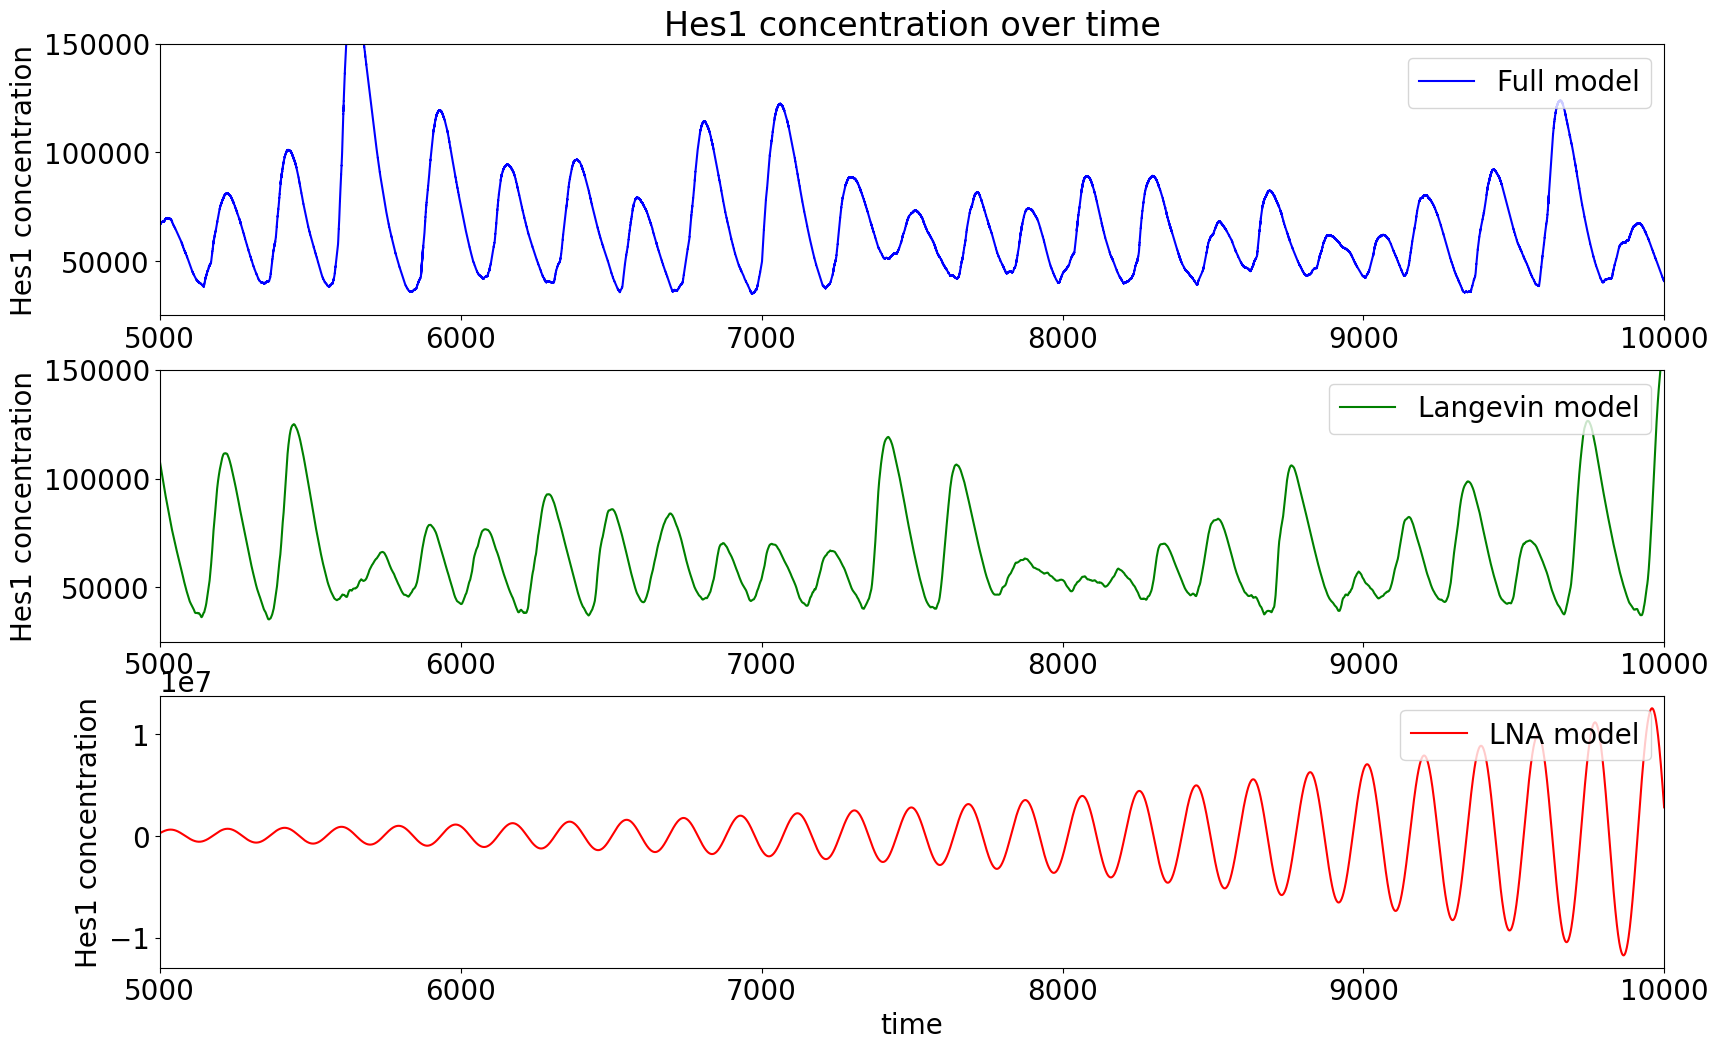

In [21]:
fig,ax=plt.subplots(3,1,figsize=(12*ratio,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(25000,150000)
ax[0].set_xlim(5000,10000)
    
linem,=ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
ax[0].legend([linem], ['Full model'], loc='upper right')
    


ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(25000,150000)
ax[1].set_xlim(5000,10000)
    
linel,=ax[1].plot(time_trajl,Hes1_trajl, color = 'green')
ax[1].legend([linel], ['Langevin model'], loc='upper right')



ax[2].set_xlabel('time') 
ax[2].set_ylabel('Hes1 concentration')

#ax[2].set_ylim(25000,150000)
ax[2].set_xlim(5000,10000)
    
linelna,=ax[2].plot(time_trajlna,Hes1_trajlna + p_stat, color = 'red')
ax[2].legend([linelna], ['LNA model'], loc='upper right')

plt.savefig(read_directory+'\\plots\\trajP - comparison Full vs Langevin - param2.pdf')
plt.show()

For this set of parameters, we observe that the deterministic solution is already oscillating. This is coherent with the results of _Wu, X. P., Eshete, M. (2011). Bifurcation analysis for a model of gene expression with delays.
Communications in Nonlinear Science and Numerical Simulation, 16(2), 1073–1088_:
if $M^*$ and $P^*$ are the constant stationary solution, then define
$$\omega_0^2 = \alpha_m \alpha_p |f'(P^*)| - \mu_m \mu_p,$$
and
$$a = \frac{-\omega_0^2 + \mu_m \mu_p}{\alpha_m \alpha_p f'(P^*)},$$
with $$ \frac{h}{P_0}\frac{(\frac{P^*}{P_0})^{h-1}}{(1+(\frac{P^*}{P_0})^h)^2}.$$

In [22]:
m_stat,p_stat = utils.resolve_stationary_state(alpha_m,mu_m,alpha_p,mu_p,h,P_0)
w_0=np.sqrt(alpha_m *alpha_p*abs(h/P_0*(p_stat/P_0)**(h-1)/(1+(p_stat/P_0)**h)**2) - mu_m*mu_p)
aaa = (-w_0**2 + mu_m*mu_p)/(alpha_m *alpha_p*(-h/P_0*(p_stat/P_0)**(h-1)/(1+(p_stat/P_0)**h)**2))

Then, denote the increasing sequence $\tau_j$,
$$\tau_j = \frac{1}{\omega_0}(arccos(a)+2\pi j),$$
so that if $\tau_j \leq \tau \leq \tau_{j+1}$, there is at least $j+1$ oscillating solutions to the problem.

In [23]:
tau_0 = np.arccos(aaa)/w_0
tau_1 = (np.arccos(aaa) + 2*np.pi)/w_0

tau_0,tau_1

(26.34415934797968, 198.42790668823056)

As $\tau = 34 > 26.35$, there is an oscillating solution to the problem. Therefore, we compare our approach to the system given by choosing a value of delay right before the bifurcation $\tau_0 \approx 26.35$: we choose $\tau = 25$.

In [24]:
val_tau=25

time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)
        
time_trajl,mRNA_trajl,Hes1_trajl = langevin.one_trajectory(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=delta_t,
                                                      Omega=val_Omega)

time_trajlna,mRNA_trajlna,Hes1_trajlna = langevin.one_trajectory_LNA(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,
                                                      mu_p=mu_p,
                                                      h=h,
                                                      P_0=P_0,
                                                      lambda_s=val_lambda,
                                                      tau=val_tau,
                                                      T=T,
                                                      delta_t=delta_t)

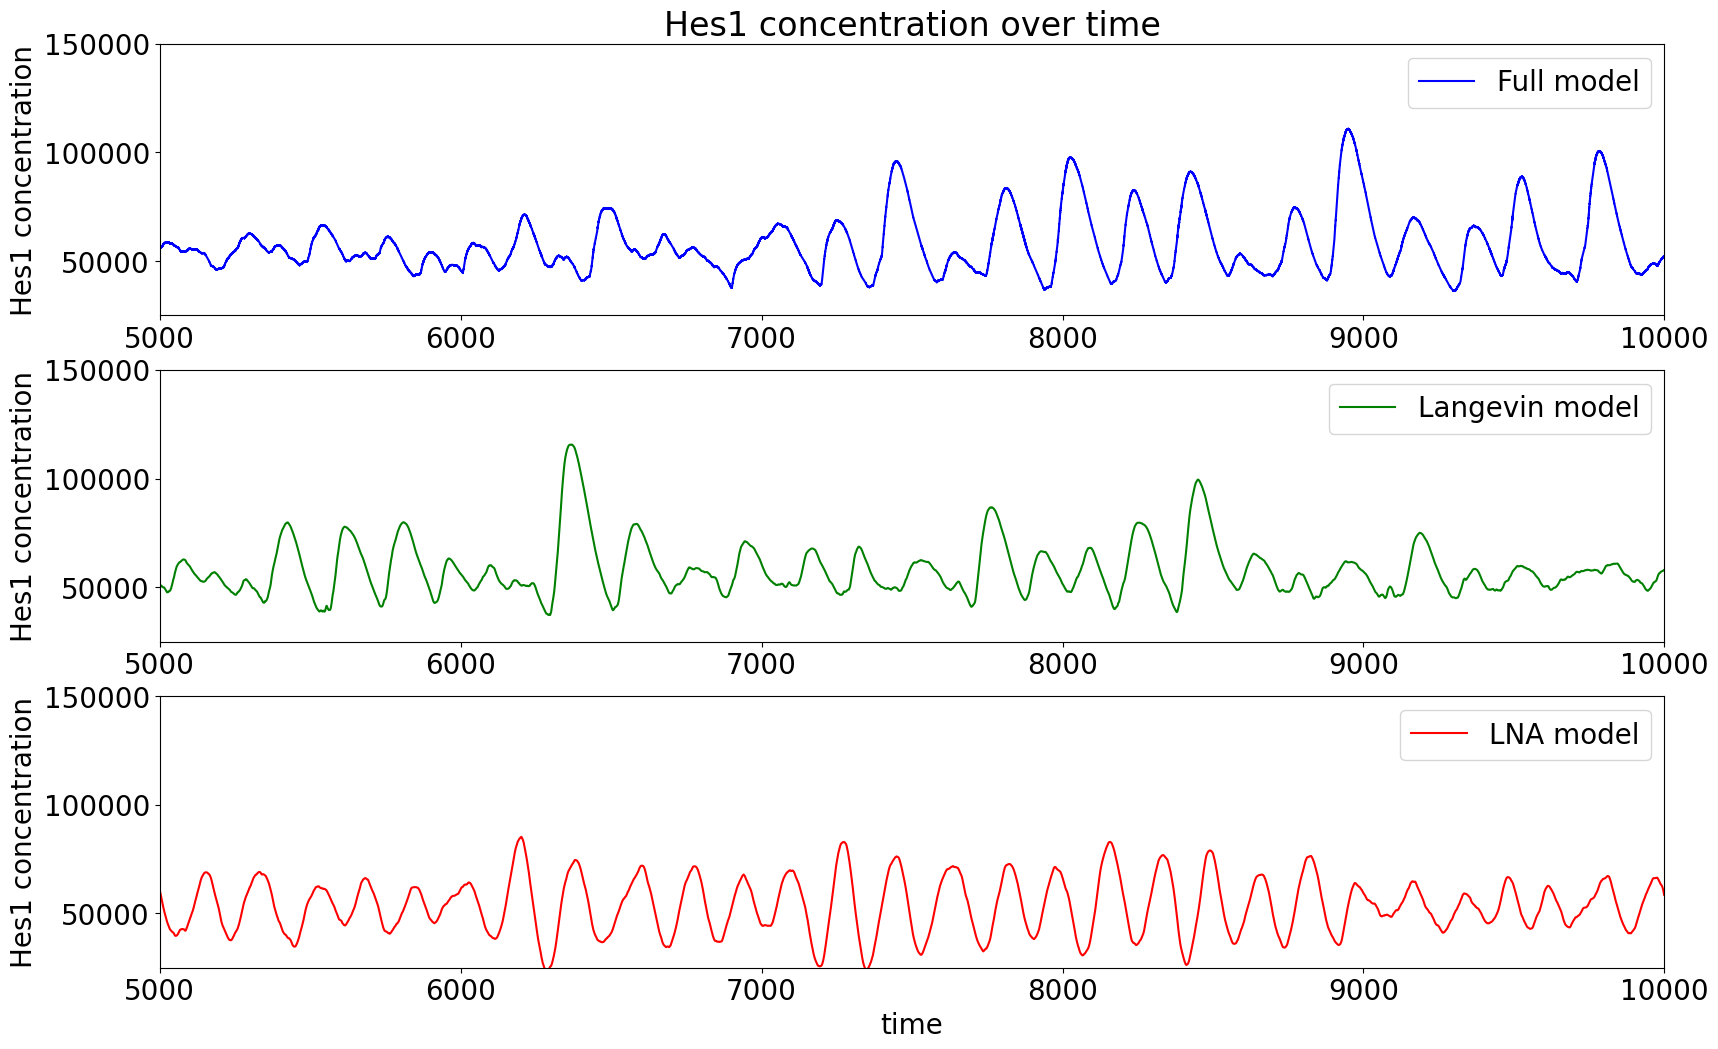

In [25]:
fig,ax=plt.subplots(3,1,figsize=(12*ratio,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(25000,150000)
ax[0].set_xlim(5000,10000)
    
linem,=ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
ax[0].legend([linem], ['Full model'], loc='upper right')
    


ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(25000,150000)
ax[1].set_xlim(5000,10000)
    
linel,=ax[1].plot(time_trajl,Hes1_trajl, color = 'green')
ax[1].legend([linel], ['Langevin model'], loc='upper right')



ax[2].set_xlabel('time') 
ax[2].set_ylabel('Hes1 concentration')

ax[2].set_ylim(25000,150000)
ax[2].set_xlim(5000,10000)
    
linelna,=ax[2].plot(time_trajlna,Hes1_trajlna + p_stat, color = 'red')
ax[2].legend([linelna], ['LNA model'], loc='upper right')

plt.savefig(read_directory+'\\plots\\trajP - comparison Full vs Langevin - param2 - beforeBifurcation.pdf')
plt.show()

## Statistical analysis (STD plots, power spectra, histograms of increments)

Now we compute data for the two sets of parameter values _PARAM1_ and _PARAM2_.

### Pre computation

#### _PARAM1_

In [26]:
alpha_m=1
alpha_p=1
mu_m=0.03
mu_p=0.03
h=4.1
P_0=10

T=10000
delta_t=0.01

n_t = int(T/delta_t)
sampling_timestep = 1
sampling_timestep_multiple = int(round(1.0/delta_t))
n_stat = n_t//(2*sampling_timestep_multiple*sampling_timestep)
n_iter = 100

In [27]:
val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
val_Omega=[1, 10, 100, 1000]
val_tau=[19.7]

n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)

spec= [alpha_m, alpha_p, mu_m, mu_p, h, P_0, T, delta_t]

In [28]:
std_Mm=np.zeros((n_lambda,n_Omega,n_tau))
std_Ml=np.zeros((n_lambda,n_Omega,n_tau))
std_Mlna=np.zeros((n_lambda,n_Omega,n_tau))

std_Pm=np.zeros((n_lambda,n_Omega,n_tau))
std_Pl=np.zeros((n_lambda,n_Omega,n_tau))
std_Plna=np.zeros((n_lambda,n_Omega,n_tau))

mean_Mm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Ml=np.zeros((n_lambda,n_Omega,n_tau))
mean_Mlna=np.zeros((n_lambda,n_Omega,n_tau))

mean_Pm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Pl=np.zeros((n_lambda,n_Omega,n_tau))
mean_Plna=np.zeros((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Ml=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Mlna=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

power_spectrum_Pm=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Pl=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Plna=np.zeros((n_stat//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

In [29]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            
            print("lambda=",val_lambda[i])
            print("Omega=",val_Omega[j])
            print("tau=",val_tau[k])
            
            #output_m=general.simulate_master_all(n_iter=n_iter, alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
            #                                                    h=h,
            #                                                    P_0=P_0,
            #                                                    lambda_s=val_lambda[i],
            #                                                    tau=val_tau[k],
            #                                                    P_init=0,
            #                                                    M_init=0,
            #                                                    T=T,
            #                                                    delta_t=delta_t,
            #                                                    Omega=val_Omega[j],
            #                                                    sampling_timestep = sampling_timestep)
            
            #output_l=general.simulate_langevin_all(n_iter=n_iter, alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
            #                                                    h=h,
            #                                                    P_0=P_0,
            #                                                    lambda_s=val_lambda[i],
            #                                                    tau=val_tau[k],
            #                                                    P_init=0,
            #                                                    M_init=0,
            #                                                    T=T,
            #                                                    delta_t=delta_t,
            #                                                    Omega=val_Omega[j],
            #                                                    sampling_timestep = sampling_timestep)
            
            output_lna=general.simulate_lna_all(n_iter=n_iter, alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                                h=h,
                                                                P_0=P_0,
                                                                lambda_s=val_lambda[i],
                                                                tau=val_tau[k],
                                                                P_init=0,
                                                                M_init=0,
                                                                T=T,
                                                                delta_t=delta_t,
                                                                Omega=val_Omega[j],
                                                                sampling_timestep = sampling_timestep)
            
            t_ref=output_lna["times"]
            freq_ref=output_lna["frequencies"]
            
            #std_Mm[i,j,k]=output_m["std Mm"]
            #std_Ml[i,j,k]=output_l["std Ml"]
            std_Mlna[i,j,k]=output_lna["std Mlna"]

            #std_Pm[i,j,k]=output_m["std Pm"]
            #std_Pl[i,j,k]=output_l["std Pl"]
            std_Plna[i,j,k]=output_lna["std Plna"]

            #mean_Mm[i,j,k]=output_m["mean Mm"]
            #mean_Ml[i,j,k]=output_l["mean Ml"]
            mean_Mlna[i,j,k]=output_lna["mean Mlna"]

            #mean_Pm[i,j,k]=output_m["mean Pm"]
            #mean_Pl[i,j,k]=output_l["mean Pl"]
            mean_Plna[i,j,k]=output_lna["mean Plna"]

            #power_spectrum_Mm[:,i,j,k]=output_m["power spectrum Mm"]
            #power_spectrum_Ml[:,i,j,k]=output_l["power spectrum Ml"]
            power_spectrum_Mlna[:,i,j,k]=output_lna["power spectrum Mlna"]
          
            #power_spectrum_Pm[:,i,j,k]=output_m["power spectrum Pm"]
            #power_spectrum_Pl[:,i,j,k]=output_l["power spectrum Pl"]
            power_spectrum_Plna[:,i,j,k]=output_lna["power spectrum Plna"]

            print("Done")
            print("\n")
        

lambda= 0.01
Omega= 1
tau= 19.7
Done


lambda= 0.01
Omega= 10
tau= 19.7
Done


lambda= 0.01
Omega= 100
tau= 19.7
Done


lambda= 0.01
Omega= 1000
tau= 19.7
Done


lambda= 0.015848931924611134
Omega= 1
tau= 19.7
Done


lambda= 0.015848931924611134
Omega= 10
tau= 19.7
Done


lambda= 0.015848931924611134
Omega= 100
tau= 19.7
Done


lambda= 0.015848931924611134
Omega= 1000
tau= 19.7
Done


lambda= 0.025118864315095794
Omega= 1
tau= 19.7
Done


lambda= 0.025118864315095794
Omega= 10
tau= 19.7
Done


lambda= 0.025118864315095794
Omega= 100
tau= 19.7
Done


lambda= 0.025118864315095794
Omega= 1000
tau= 19.7
Done


lambda= 0.03981071705534971
Omega= 1
tau= 19.7
Done


lambda= 0.03981071705534971
Omega= 10
tau= 19.7
Done


lambda= 0.03981071705534971
Omega= 100
tau= 19.7
Done


lambda= 0.03981071705534971
Omega= 1000
tau= 19.7
Done


lambda= 0.0630957344480193
Omega= 1
tau= 19.7
Done


lambda= 0.0630957344480193
Omega= 10
tau= 19.7
Done


lambda= 0.0630957344480193
Omega= 100
tau= 19.7
Done


la

In [30]:
pd.DataFrame(spec,columns=['value']).to_csv(read_directory+'\\data1\\spec.csv')
pd.DataFrame(val_lambda,columns=['value']).to_csv(read_directory+'\\data1\\lambda.csv')
pd.DataFrame(val_Omega,columns=['value']).to_csv(read_directory+'\\data1\\Omega.csv')
pd.DataFrame(val_tau,columns=['value']).to_csv(read_directory+'\\data1\\tau.csv')

pd.DataFrame(t_ref,columns=['value']).to_csv(read_directory+'\\data1\\times.csv')
pd.DataFrame(freq_ref,columns=['value']).to_csv(read_directory+'\\data1\\freq.csv')

pd.DataFrame(std_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Mm.csv')
pd.DataFrame(std_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Ml.csv')
pd.DataFrame(std_Mlna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Mlna.csv')
pd.DataFrame(std_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Pm.csv')
pd.DataFrame(std_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Pl.csv')
pd.DataFrame(std_Plna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\std_Plna.csv')

pd.DataFrame(mean_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Mm.csv')
pd.DataFrame(mean_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Ml.csv')
pd.DataFrame(mean_Mlna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Mlna.csv')
pd.DataFrame(mean_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Pm.csv')
pd.DataFrame(mean_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Pl.csv')
pd.DataFrame(mean_Plna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\mean_Plna.csv')

In [31]:
pd.DataFrame(power_spectrum_Mm.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Mm.csv')
pd.DataFrame(power_spectrum_Ml.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Ml.csv')
pd.DataFrame(power_spectrum_Mlna.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Mlna.csv')
pd.DataFrame(power_spectrum_Pm.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Pm.csv')
pd.DataFrame(power_spectrum_Pl.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Pl.csv')
pd.DataFrame(power_spectrum_Plna.reshape(((n_stat//2)*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data1\\power_spectrum_Plna.csv')

#### _PARAM2_

In [ ]:
alpha_m=39.93
alpha_p=21.56
mu_m=0.033
mu_p=0.011
h=4.78
P_0=24201.01

T=10000
delta_t=0.01

n_t=int(T/delta_t)

In [ ]:
val_lambda=[10**x for x in np.arange(-2,2.1,0.2)]
val_Omega=[1]
val_tau=[25,34]

n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)

spec= [alpha_m, alpha_p, mu_m, mu_p, h, P_0, T, delta_t]

In [ ]:
std_Mm=np.zeros((n_lambda,n_Omega,n_tau))
std_Ml=np.zeros((n_lambda,n_Omega,n_tau))
std_Mlna=np.zeros((n_lambda,n_Omega,n_tau))

std_Pm=np.zeros((n_lambda,n_Omega,n_tau))
std_Pl=np.zeros((n_lambda,n_Omega,n_tau))
std_Plna=np.zeros((n_lambda,n_Omega,n_tau))

mean_Mm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Ml=np.zeros((n_lambda,n_Omega,n_tau))
mean_Mlna=np.zeros((n_lambda,n_Omega,n_tau))

mean_Pm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Pl=np.zeros((n_lambda,n_Omega,n_tau))
mean_Plna=np.zeros((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=np.zeros((T//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Ml=np.zeros((T//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Mlna=np.zeros((T//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

power_spectrum_Pm=np.zeros((T//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Pl=np.zeros((T//2,n_lambda,n_Omega,n_tau) ,dtype=np.ndarray)
power_spectrum_Plna=np.zeros((T//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

In [ ]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            
            print("lambda=",val_lambda[i])
            print("Omega=",val_Omega[j])
            print("tau=",val_tau[k])
            
            output=utils.compute_fourier_transform_mean_and_std(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,h=h,
                                                      P_0=P_0,
                                                      n_iter=500,lambda_s=val_lambda[i],
                                                      tau=val_tau[k],
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=delta_t,
                                                      Omega=val_Omega[j])            
            
            t_ref=output["times"]
            freq_ref=output["frequencies"]
            
            std_Mm[i,j,k]=output["std Mm"]
            std_Ml[i,j,k]=output["std Ml"]
            std_Mlna[i,j,k]=output["std Mlna"]

            std_Pm[i,j,k]=output["std Pm"]
            std_Pl[i,j,k]=output["std Pl"]
            std_Plna[i,j,k]=output["std Plna"]

            mean_Mm[i,j,k]=output["mean Mm"]
            mean_Ml[i,j,k]=output["mean Ml"]
            mean_Mlna[i,j,k]=output["mean Mlna"]

            mean_Pm[i,j,k]=output["mean Pm"]
            mean_Pl[i,j,k]=output["mean Pl"]
            mean_Plna[i,j,k]=output["mean Plna"]

            power_spectrum_Mm[:,i,j,k]=output["power spectrum Mm"]
            power_spectrum_Ml[:,i,j,k]=output["power spectrum Ml"]
            power_spectrum_Mlna[:,i,j,k]=output["power spectrum Mlna"]
            
            power_spectrum_Pm[:,i,j,k]=output["power spectrum Pm"]
            power_spectrum_Pl[:,i,j,k]=output["power spectrum Pl"]
            power_spectrum_Plna[:,i,j,k]=output["power spectrum Plna"]

            print("Done")
            print("\n")
        

Now we save the data.

In [ ]:
pd.DataFrame(spec,columns=['value']).to_csv(read_directory+'\\data2\\spec.csv')
pd.DataFrame(val_lambda,columns=['value']).to_csv(read_directory+'\\data2\\lambda.csv')
pd.DataFrame(val_Omega,columns=['value']).to_csv(read_directory+'\\data2\\Omega.csv')
pd.DataFrame(val_tau,columns=['value']).to_csv(read_directory+'\\data2\\tau.csv')

pd.DataFrame(t_ref,columns=['value']).to_csv(read_directory+'\\data2\\times.csv')
pd.DataFrame(freq_ref,columns=['value']).to_csv(read_directory+'\\data2\\freq.csv')

pd.DataFrame(std_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Mm.csv')
pd.DataFrame(std_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Ml.csv')
pd.DataFrame(std_Mlna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Mlna.csv')
pd.DataFrame(std_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Pm.csv')
pd.DataFrame(std_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Pl.csv')
pd.DataFrame(std_Plna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\std_Plna.csv')

pd.DataFrame(mean_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Mm.csv')
pd.DataFrame(mean_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Ml.csv')
pd.DataFrame(mean_Mlna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Mlna.csv')
pd.DataFrame(mean_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Pm.csv')
pd.DataFrame(mean_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Pl.csv')
pd.DataFrame(mean_Plna.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\mean_Plna.csv')

pd.DataFrame(power_spectrum_Mm.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Mm.csv')
pd.DataFrame(power_spectrum_Ml.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Ml.csv')
pd.DataFrame(power_spectrum_Mlna.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Mlna.csv')
pd.DataFrame(power_spectrum_Pm.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Pm.csv')
pd.DataFrame(power_spectrum_Pl.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Pl.csv')
pd.DataFrame(power_spectrum_Plna.reshape((T//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data2\\power_spectrum_Plna.csv')

### STD plots (against lambda)

Now we load the data. You can input the name of the folder you want to use in variable "read_directory". As the folders are named by their date of creation, you can also modify the variable "string_date0".

In [ ]:
read_directory = os.getcwd() + '\\paper plots ' + string_date
#string_date0='2023-11-2-2-34-55'
#read_directory = os.getcwd() + '\\paper plots ' + string_date0

In [ ]:
data_number=1
read_data = read_directory + '\\data' + str(data_number)

In [ ]:
spec=pd.read_csv(read_data + '\\spec.csv')['value'].values
val_lambda=pd.read_csv(read_data + '\\lambda.csv')['value'].values
val_Omega=pd.read_csv(read_data + '\\Omega.csv')['value'].values
val_tau=pd.read_csv(read_data + '\\tau.csv')['value'].values

alpha_m=spec[0]
alpha_p=spec[1]
mu_m=spec[2]
mu_p=spec[3]
h=spec[4]
P_0=spec[5]

T=spec[6]
delta_t=spec[7]

n_t=int(T/delta_t)

sampling_timestep = 1
sampling_timestep_multiple = int(round(1.0/delta_t))
n_stat = n_t//(2*sampling_timestep_multiple*sampling_timestep)

In [ ]:
n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)

In [ ]:
t_ref=pd.read_csv(read_data + '\\times.csv')['value'].values
freq_ref=pd.read_csv(read_data+'\\freq.csv')['value'].values

std_Mm=pd.read_csv(read_data + '\\std_Mm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Ml=pd.read_csv(read_data + '\\std_Ml.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Mlna=pd.read_csv(read_data + '\\std_Mlna.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Pm=pd.read_csv(read_data + '\\std_Pm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Pl=pd.read_csv(read_data + '\\std_Pl.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Plna=pd.read_csv(read_data + '\\std_Plna.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))

mean_Mm=pd.read_csv(read_data + '\\mean_Mm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Ml=pd.read_csv(read_data + '\\mean_Ml.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Mlna=pd.read_csv(read_data + '\\mean_Mlna.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Pm=pd.read_csv(read_data + '\\mean_Pm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Pl=pd.read_csv(read_data + '\\mean_Pl.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Plna=pd.read_csv(read_data + '\\mean_Plna.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=pd.read_csv(read_data + '\\power_spectrum_Mm.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))
power_spectrum_Ml=pd.read_csv(read_data + '\\power_spectrum_Ml.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))
power_spectrum_Mlna=pd.read_csv(read_data + '\\power_spectrum_Mlna.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))
power_spectrum_Pm=pd.read_csv(read_data + '\\power_spectrum_Pm.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))
power_spectrum_Pl=pd.read_csv(read_data + '\\power_spectrum_Pl.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))
power_spectrum_Plna=pd.read_csv(read_data + '\\power_spectrum_Plna.csv')['value'].values.reshape((n_stat//2,n_lambda,n_Omega,n_tau))

This is the evolution of the STD of the full model and the Langevin model against $\lambda$, for a fixed value of $\Omega$ (the last one here, among those stored in the variable "val_Omega").

In [ ]:
for k in range(n_tau):
    fig, ax1 = plt.subplots(figsize=(12*ratio,12)) 

    ax1.set_title('Hes1 concentration STD against lambda') 
    ax1.set_xlabel('lambda') 
    ax1.set_ylabel('Concentration STD')
    
    linem,=ax1.plot(val_lambda, std_Pm[:,-1,k], color = 'blue') 
    linel,=ax1.plot(val_lambda, std_Pl[:,-1,k], color = 'green')
    linelna,=ax1.plot(val_lambda, std_Plna[:,-1,k], color = 'red')

    #ax1.set_ylim(0,120)
    ax1.tick_params(axis ='y') 
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend([linem, linel, linelna], ['Full model', 'Langevin model', 'LNA model'])

    plt.savefig(read_directory +'\\plots\\plot_std_P - OmegaMax - tau = '+ str(val_tau[k]) + ' - param'+str(data_number)+'.pdf')  

    plt.show()

Similarly, we plot the relative error between the previous two curves. We observe that the error becomes not significant when $\lambda > 1$.

In [ ]:
for k in range(n_tau):
    fig, ax1 = plt.subplots(figsize=(12*ratio,12)) 

    ax1.set_title('Relative error of Hes1 concentration STD against lambda') 
    ax1.set_xlabel('lambda') 
    ax1.set_ylabel('Concentration STD error')
    
    error = abs(std_Pm[:,-1,k] - std_Pl[:,-1,k])/std_Pm[:,-1,k]
    linec,=ax1.plot(val_lambda, error, color = 'red')

    #ax1.set_ylim(0,1)
    ax1.tick_params(axis ='y')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend([linec], ['Relative error of STD'])

    plt.savefig(read_directory +'\\plots\\plot_error_std_P - OmegaMax - tau = '+ str(val_tau[k]) + '- param'+str(data_number)+'.pdf')  

    plt.show()

### STD plots (against Omega and lambda)

Here we plot the level curves of the STD relative error (see previous curve), against both $\lambda$ and $\Omega$. Note that you would need to create date for multiple values of $\lambda$ and $\Omega$ to obtain a relevant figure.

In [ ]:
for k in range(n_tau):

    levels=np.array([0.005,0.01, 0.015, 0.02, 0.025] + [k/20 for k in range(1,20)])

    fig, ax1 = plt.subplots(figsize=(12*ratio,12)) 
    ax1.set_title('Hes1 concentration STD relative error level curves') 
    ax1.set_xlabel('1/Omega') 
    ax1.set_ylabel('1/lambda') 

    inv_val_Omega=[1/x for x in val_Omega]
    inv_val_lambda = [1/x for x in val_lambda]

    contours1=ax1.contour(inv_val_Omega, inv_val_lambda, abs(std_Pm[:,:,k] - std_Pl[:,:,0])/std_Pm[:,:,k], cmap = 'copper', levels=levels)

    circle_x = np.arange(0,0.25,0.01)
    circle_y = np.arange(0,0.25,0.01)

    line,=ax1.plot(circle_x, 3.7-20*circle_x, '--', color = 'red')
    ax1.fill_between(circle_x, 3.7-20*circle_x, alpha=0.1, color='red')

    ax1.tick_params(axis ='y') 
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.clabel(contours1,inline=1, fontsize=10)

    plt.savefig(read_directory +'\\plots\\plot_level_curve_std_Pm_vs_Pl - param'+str(data_number)+'.pdf')
    plt.show()

### Power spectra

Now we plot the power spectra of the Hes1 concentration trajectories for different values of $\lambda$ and $\Omega$. The green spectrum is expected to get closer to the blue one when $\lambda$ and $\Omega$ are big enough.

In [ ]:
try:
    os.makedirs(read_directory+'\\plots\\powerSpectra - param' + str(data_number))
except FileExistsError:
    pass

In [ ]:
m_stat,p_stat = utils.resolve_stationary_state(alpha_m,mu_m,alpha_p,mu_p,h,P_0)
w_0=np.sqrt(alpha_m *alpha_p*abs(h/P_0*(p_stat/P_0)**(h-1)/(1+(p_stat/P_0)**h)**2) - mu_m*mu_p)
aaa = (-w_0**2 + mu_m*mu_p)/(alpha_m *alpha_p*(-h/P_0*(p_stat/P_0)**(h-1)/(1+(p_stat/P_0)**h)**2))

In [ ]:
tau_0 = np.arccos(aaa)/w_0
tau_1 = (np.arccos(aaa) + 2*np.pi)/w_0

tau_0,tau_1

In [ ]:
for i_lambda in range(n_lambda):
    
    for k in range(1): #for k in range(n_tau):
        
        print("lambda = ", val_lambda[i_lambda])
        
        fig, ax1 = plt.subplots(figsize=(12*ratio,12)) 

        ax1.set_title('Hes1 Power spectrum') 
        ax1.set_xlabel('Frequency') 
        ax1.set_ylabel('Power') 

        freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=val_lambda[i_lambda],
                                                tau=val_tau[k],
                                                Omega=val_Omega[-1],
                                                T=T/2,
                                                delta_t=delta_t)
        
        linem,=ax1.plot(freq_ref[1:400], power_spectrum_Pm[1:400,i_lambda,-1,k], color = 'blue') 
        linel,=ax1.plot(freq_ref[1:400], power_spectrum_Pl[1:400,i_lambda,-1,k], color = 'green')
        linelna,=ax1.plot(freq_ref[1:400], power_spectrum_Plna[1:400,i_lambda,-1,k], color = 'red')
        linet,=ax1.plot(freq_ref[1:400], Sp[1:400], '--', color = 'red')

        ax1.tick_params(axis ='y') 
        ax1.set_yscale('log')        
        ax1.legend([linem, linel,linelna, linet], ['Full model', 'Langevin model', 'LNA model', 'Theoretical LNA spectrum'])

        ax1.set_xlim(0, 0.14)

        plt.savefig(read_directory + '\\plots\\powerSpectra - param' + str(data_number) + '\\plot_power_spectrum_P - i_lambda=' + str(i_lambda) + ' & OmegaMax - tau = '+ str(val_tau[k]) + ' - param'+str(data_number)+'.pdf')  

        plt.show()

### Distribution in stationary regime

In [ ]:
m_stat,p_stat = utils.resolve_stationary_state(alpha_m,mu_m,alpha_p,mu_p,h,P_0)
m_stat,p_stat

In [ ]:
lambda_s=100
tau=19.7
Omega=1

In [ ]:
T=10000
delta_t=0.001

In [ ]:
N=50

n_t=int(T/delta_t)
n_stat=n_t//2

@jit
def test(n):
    spectrum = np.zeros(n_stat)
    
    for k in range(n):
        t,Mlna,Plna = langevin.one_trajectory_LNA(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                          lambda_s=lambda_s,
                                                          P_0=P_0,
                                                          h=h,
                                                          tau=tau,
                                                          P_init=0,
                                                          M_init=0,
                                                          T=T,
                                                          delta_t=delta_t,
                                                          Omega=Omega)
        
        
        

        spectrum += abs(np.fft.fft(Plna[n_t//2:]/p_stat, norm='ortho'))**2/n   #utils.compute_power_spectrum_traj(t[n_stat:],Plna[n_stat:])/n
        print(k+1, ' ', end=' ')
    return spectrum

In [ ]:
spectrum = test(N)

In [ ]:
spectrum

In [ ]:
fig, ax1 = plt.subplots(figsize=(12*ratio,12)) 

freq_th,Sm,Sp=utils.lna_power_spectrum(alpha_m=alpha_m, alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p,
                                                h=h,
                                                P_0=P_0,
                                                lambda_s=lambda_s,
                                                tau=tau,
                                                Omega=Omega,
                                                T=T/2,
                                                delta_t=delta_t)

K_rescale = (P_0/10)**2/2

#linel, ax1.plot(freq_ref[1:200], power_spectrum_Pl[0:199,-1,-1,0]/n_t**2, color = 'green')
#linelna, ax1.plot(freq_ref[1:200], power_spectrum_Plna[0:199,-1,-1,0]/n_t**2, color = 'orange')
linelna_bis,=ax1.plot(freq_th[1:100], spectrum[1:100],'o', color = 'red')
linet,=ax1.plot(freq_th[1:100], Sp[1:100]/K_rescale, '--', color = 'red')

ax1.tick_params(axis ='y') 
ax1.set_yscale('log')        
        
#ax1.set_xlim(0, 0.04)

plt.show()

Here we show the distributions of the concentration in stationary regime for both models. We hope that the green curve (Langevin model) is close to the blue one (full model).

In [ ]:
pool_Mm,pool_Pm=master.pool_values(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,h=h,P_0=P_0,
                                                      n_iter=50,tau=25,lambda_s=1,Omega=1,T=T,delta_t=delta_t)
pool_Ml,pool_Pl=langevin.pool_values(alpha_m=alpha_m,alpha_p=alpha_p,mu_m=mu_m,mu_p=mu_p,h=h,P_0=P_0,
                                                      n_iter=50,tau=25,lambda_s=1,Omega=1,T=T,delta_t=delta_t)

In [ ]:
hist_Mm=plt.hist(pool_Mm,bins=20,histtype='step',density=True,color='blue')
hist_Ml=plt.hist(pool_Ml,bins=20,histtype='step',density=True,color='green')

plt.savefig(read_directory + '\\plots\\hist_M - i_lambda=' + str(i_lambda) + ' & Omega - param'+str(data_number)+'.pdf')  


In [ ]:
hist_Pm=plt.hist(pool_Pm,bins=20,histtype='step',density=True,color='blue')
hist_Pl=plt.hist(pool_Pl,bins=20,histtype='step',density=True,color='green')

plt.savefig(read_directory + '\\plots\\hist_P - i_lambda=' + str(i_lambda) + ' & Omega - param'+str(data_number)+'.pdf')  


### Increments

Now we plot the histograms of the mRNA and Hes1 concentration "increments" (or "variations") for different values of $\lambda$ ($\Omega=1$ is set here). We expect the these increments to be (quasi) Gaussian when $\lambda$ is big enough.

#### Kullback-Leibler divergence

In [ ]:
incr_step = [10/x for x in val_lambda]
N_data = [1000 for x in val_lambda]

In [ ]:
try:
    os.makedirs(read_directory+'\\plots\\hist - param' + str(data_number))
except FileExistsError:
    pass

In [ ]:
bin_step = 0.25

In [ ]:
def KullbackLeibler():
    
    
    KL_self=np.zeros((n_lambda,n_Omega, n_tau))
    
    
    for i in range(n_lambda//2,n_lambda):
        for k in range(n_tau):
            j=-1

            print("lambda=",val_lambda[i])
            print("Omega=",val_Omega[j])
            
            _, _, _, data_P_incr, _, _, mean_P, std_P = utils.generateIncrements(
                                                          alpha_m=alpha_m,
                                                          alpha_p=alpha_p, mu_m=mu_m, mu_p=mu_p, h=h, P_0=P_0,
                                                          lambda_s=val_lambda[i],
                                                          tau=val_tau[k],
                                                          P_init=0,
                                                          M_init=0,
                                                          T=5000,
                                                          Omega=val_Omega[j],
                                                          N_data=N_data[i],
                                                          incr_step = incr_step[i])
           
            
            m=np.mean(data_P_incr)
            sigma=np.std(data_P_incr)
            data_P_incr = (data_P_incr - m)/sigma
            
            #bb=np.arange(int(min(data_P_incr)), int(max(data_P_incr)+1), bin_step*std_P)
            bb=20
            
            l_points = np.histogram(data_P_incr, bins=bb)[1][0:-1]
            r_points = np.histogram(data_P_incr, bins=bb)[1][1:]
            mid_points = (l_points + r_points)/2
            
            self_pdf = np.array([norm.pdf(x,loc=0, scale=1) for x in mid_points])
            
            KL_self[i,j,k] = np.mean(rel_entr( np.histogram(data_P_incr, bins=bb, density = True)[0], self_pdf) )
                        
            
            
            
            fig, ax = plt.subplots(1, 1, figsize=(12*ratio,12)) 
            
            hist_P = ax.hist(data_P_incr, bins=bb, histtype='bar', density=True, color='grey')
            #hist_P = ax.plot(mid_points, np.histogram(data_P_incr, bins=100, density = True)[0], color='grey')
            
            sample= np.linspace(min(data_P_incr), max(data_P_incr), 100)
            distrib = ax.plot(sample,norm.pdf(sample,loc=0, scale=1), color='red')
            #distrib = ax.plot(mid_points, self_pdf, color='red')

            
            plt.savefig(read_directory + '\\plots\\hist - param' + str(data_number) + '\\incr_hist_P - i_lambda=' + str(val_lambda[i]) + ' & Omega'+ str(val_Omega[j]) + ' & tau'+ str(val_tau[k]) + '.pdf')
            plt.show()
            
            print("Done")
            print("\n")
            
    return KL_self

In [ ]:
KL_self=KullbackLeibler()

In [ ]:
for k in range(n_tau):

    fig, ax1 = plt.subplots(1,1,figsize=(12*ratio,12)) 

    ax1.set_title('Kullback-Leibler divergence against lambda') 
    ax1.set_xlabel('lambda')
    ax1.set_ylabel('Kullback-Leibler divergence')

    line1,=ax1.plot(val_lambda[n_lambda//2:], KL_self[n_lambda//2:,-1, k], color = 'grey')


    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.tick_params(axis ='y')

    plt.savefig(read_directory +'\\plots\\plot_KLdiv - OmegaMax - tau = '+ str(val_tau[k]) + ' - param'+str(data_number)+'.pdf')  

    plt.show()

In [ ]:
bb=20

def KL_test(N,n_l):
    ll=np.zeros(n_l)
    lam_list = np.array([10**k for k in range(0,n_l)])
    for k in range(0,n_l):
        X= np.random.poisson(lam = lam_list[k], size=N)
        Y= np.random.normal(lam_list[k],lam_list[k], size=N)
        ll[k]=np.mean(rel_entr( np.histogram(X, bins=bb, density = True)[0],  np.histogram(Y, bins=bb, density = True)[0]))
    return lam_list, ll

In [ ]:
X,Y = KL_test(100000,7)

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(12*ratio,12)) 

ax1.set_title('Kullback-Leibler divergence against poisson coeff') 
ax1.set_xlabel('poisson coeff')
ax1.set_ylabel('Kullback-Leibler divergence')

line1,=ax1.plot(X,Y, color = 'grey')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.tick_params(axis ='y')